In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score

In [2]:
wine_dataset = pd.read_csv("../winequality-red.csv")

In [3]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine_dataset.shape

(1599, 12)

In [5]:
wine_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


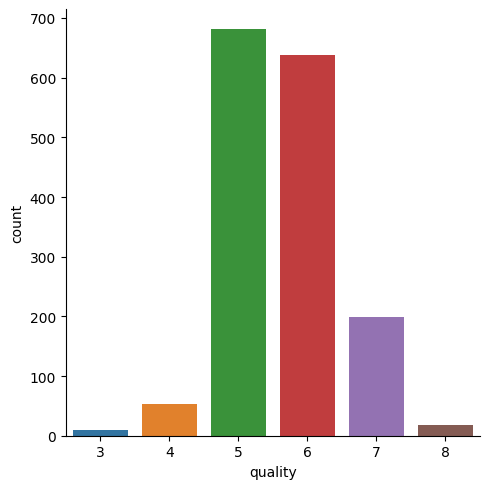

In [40]:
sns.catplot(x="quality", data=wine_dataset, kind="count")

<Axes: xlabel='quality', ylabel='volatile acidity'>

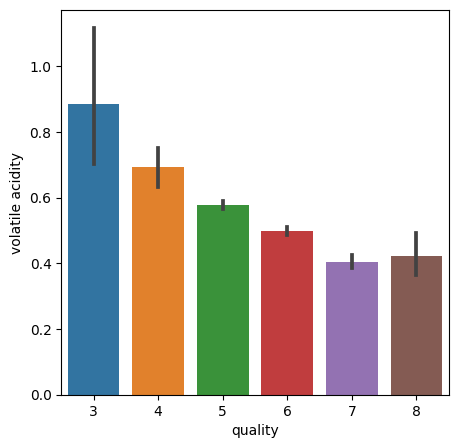

In [41]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x="quality", y="volatile acidity", data=wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

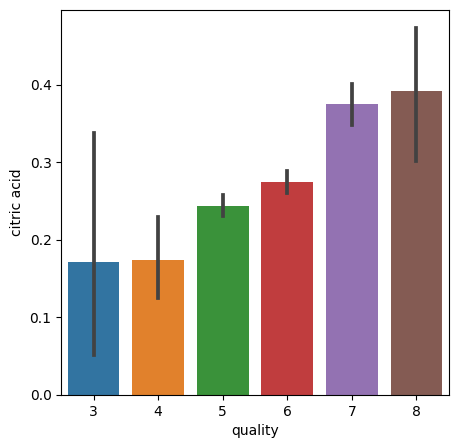

In [42]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x="quality", y="citric acid", data=wine_dataset)

<Axes: xlabel='quality', ylabel='alcohol'>

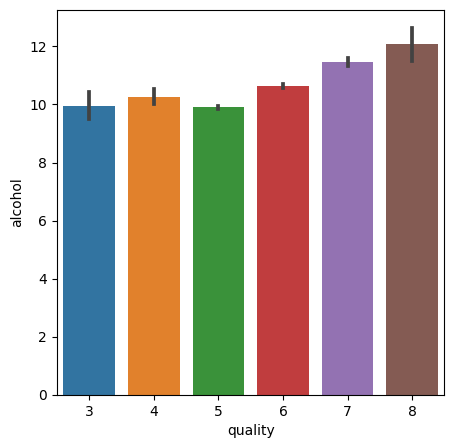

In [9]:
plot = plt.figure(figsize=(5,5))
sns.barplot(x="quality", y="alcohol", data=wine_dataset)

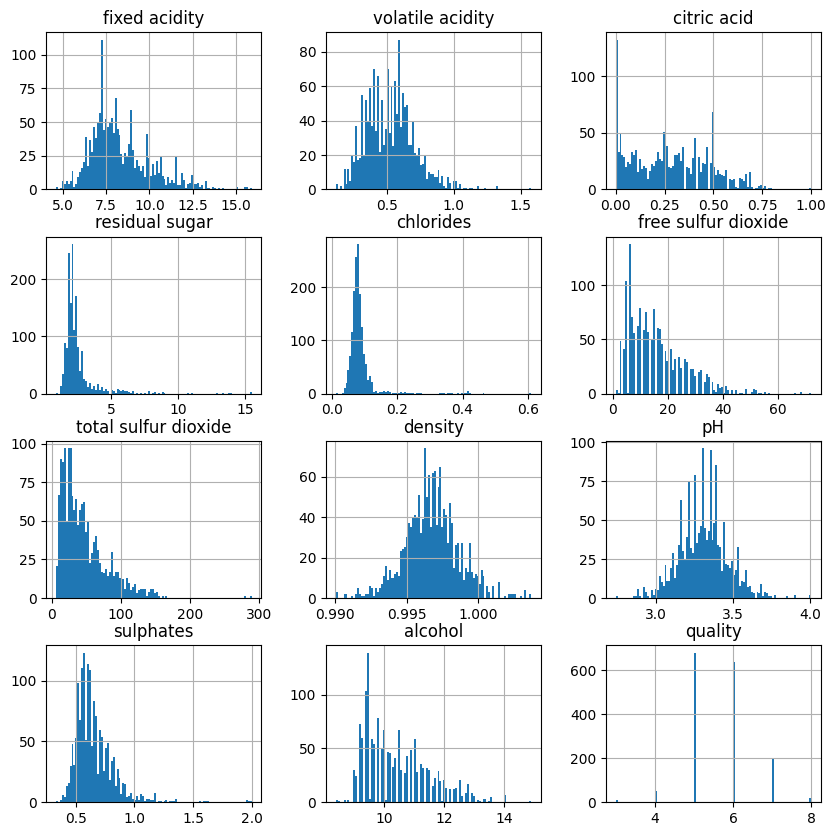

In [10]:
wine_dataset.hist(bins=100, figsize=(10,10))
plt.show()

In [11]:
correlation = wine_dataset.corr()

<Axes: >

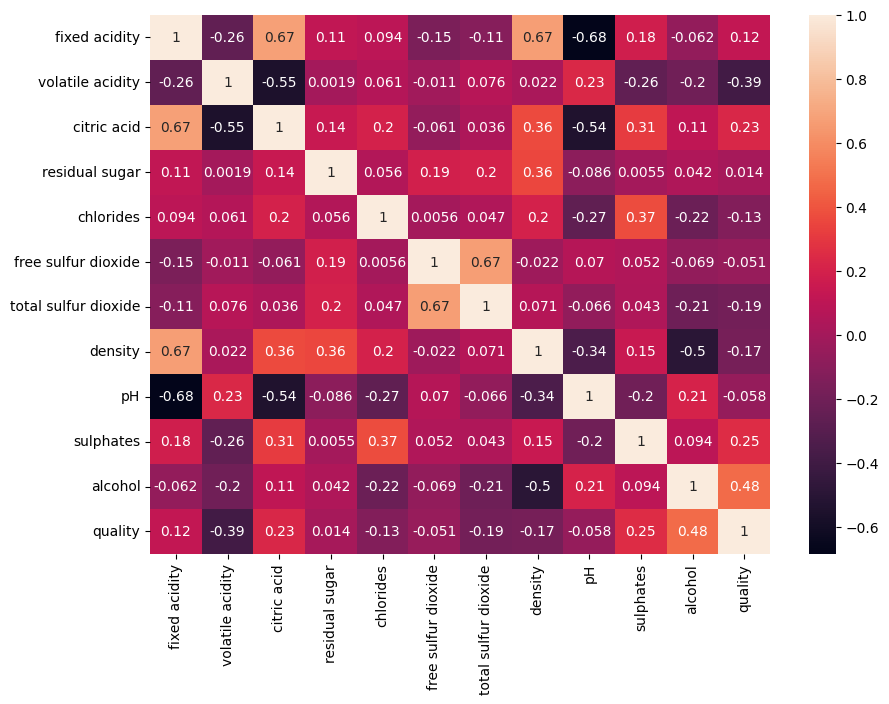

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(correlation, annot=True)

In [13]:
wine_dataset.corr()["quality"].sort_values()

volatile acidity       -0.390558
total sulfur dioxide   -0.185100
density                -0.174919
chlorides              -0.128907
pH                     -0.057731
free sulfur dioxide    -0.050656
residual sugar          0.013732
fixed acidity           0.124052
citric acid             0.226373
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

In [14]:
X= wine_dataset.drop("quality", axis=1)

In [15]:
print(X.head(4))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
0            7.4              0.70         0.00             1.9      0.076  \
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
0                 11.0                  34.0   0.9978  3.51       0.56  \
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   

   alcohol  
0      9.4  
1      9.8  
2      9.8  
3      9.8  


In [16]:
Y = wine_dataset["quality"].apply(lambda y_value:1 if y_value>=6.5 else 0)

In [17]:
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64


In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

In [19]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


In [20]:
logreg = LogisticRegression()

In [21]:
logreg.fit(X_train, Y_train)

LogisticRegression()

In [22]:
logreg_pred = logreg.predict(X_test)
logreg_acc = accuracy_score(logreg_pred, Y_test)
print("Test accuracy score is: ", logreg_acc*100)

Test accuracy score is:  90.0


In [23]:
dtree = DecisionTreeClassifier()

In [24]:
dtree.fit(X_train, Y_train)

DecisionTreeClassifier()

In [25]:
dtree_pred = dtree.predict(X_test)
dtree_acc = accuracy_score(dtree_pred, Y_test)
print("Test Accuracy score is:", dtree_acc*100)

Test Accuracy score is: 89.6875


In [26]:
rforest = RandomForestClassifier()

In [27]:
rforest.fit(X_train, Y_train)

RandomForestClassifier()

In [28]:
rforest_pred = rforest.predict(X_test)
rforest_acc = accuracy_score(rforest_pred, Y_test)
print("Test Accuracy score is:", rforest_acc*100)

Test Accuracy score is: 92.5
